In [1]:
import matplotlib.pyplot as plt

from maploc.osm.viz import Colormap, plot_nodes
from maploc.utils.viz_2d import plot_images
from maploc.osm.parser import Patterns
from maploc.osm.download import get_osm

%load_ext autoreload
%autoreload 2
import torch
from torchvision import transforms
from PIL import Image
import numpy as np
from vigor_osm_handler import *

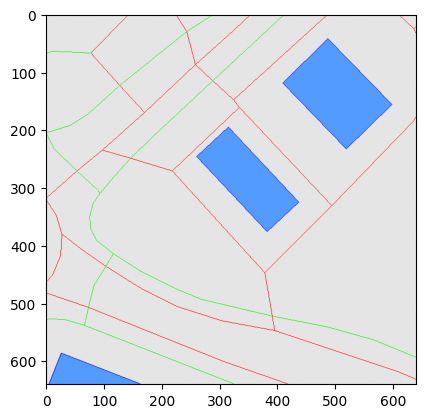

In [4]:
raster = get_osm_raster((46.223181, 6.068631))

map_viz = Colormap.apply(raster)
plt.imshow(map_viz)

In [3]:
# We need to figure out pixe_per_meter for each dataset
raster = get_osm_raster((46.223181, 6.068631))
map_viz = Colormap.apply(raster)

# plt.imshow(map_viz)

HHTP ERROR


ValueError: 500 Internal Server Error: <html>
<head><title>500 Internal Server Error</title></head>
<body>
<center><h1>500 Internal Server Error</h1></center>
<hr><center>nginx/1.18.0</center>
</body>
</html>


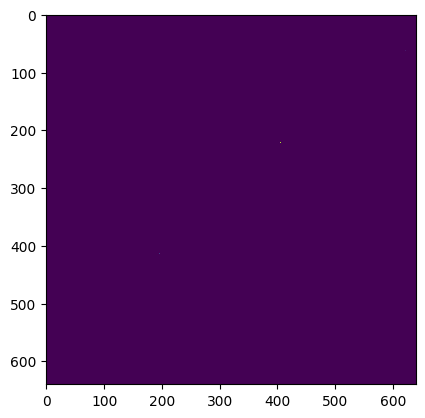

In [5]:
raster[1]
plt.imshow(raster[2], interpolation="nearest")

In [6]:
n = len(Patterns.areas.keys()) + len(Patterns.ways.keys()) + len(Patterns.nodes.keys())
n

50

In [7]:
transform_sat = transforms.Compose(
    [
        # resize
        transforms.Resize([512, 512]),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

In [8]:
raster = canvas.raster
tensor = torch.from_numpy(np.ascontiguousarray(raster)).float()
transform_sat(tensor).size()

NameError: name 'canvas' is not defined

In [9]:
bbox_osm = proj.unproject(bbox + 10)
r = get_osm(bbox_osm)

NameError: name 'proj' is not defined

In [10]:
len(r["elements"])

NameError: name 'r' is not defined

In [2]:
import os, pickle, gzip

root = "../../VIGOR"
city = "NewYork"
osm_tile_path = os.path.join(root, city, "osm_tiles", "data.pkl.gz")
with gzip.open(osm_tile_path, "rb") as f:
    loaded_data = pickle.load(f)

In [3]:
name, m = loaded_data[0]
new_data = np.zeros((len(loaded_data), 3, 640, 640), dtype=np.int8)
for i, data in tqdm(enumerate(loaded_data)):
    name, m = data
    new_data[i] = m

4326it [00:09, 443.97it/s]

: 

satellite_40.7201152747_-73.990557236.png



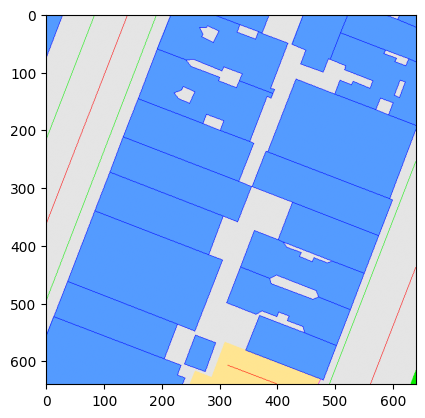

In [16]:
name, raster = loaded_data[4210]
map_viz = Colormap.apply(raster)
print(name)
plt.imshow(map_viz)

In [27]:
osm_tile = raster
osm_tile = np.array(Colormap.apply(osm_tile))
osm_tile = np.moveaxis(osm_tile, -1, 0)
osm_tile.shape


(3, 640, 640)

In [29]:
osm_tile

array([[[0.32941176, 0.32941176, 0.32941176, ..., 0.32941176,
         0.32941176, 0.32941176],
        [0.32941176, 0.32941176, 0.32941176, ..., 0.32941176,
         0.32941176, 0.32941176],
        [0.32941176, 0.32941176, 0.32941176, ..., 0.32941176,
         0.32941176, 0.32941176],
        ...,
        [0.32941176, 0.32941176, 0.32941176, ..., 0.03137255,
         0.03137255, 0.03137255],
        [0.32941176, 0.32941176, 0.32941176, ..., 0.03137255,
         0.03137255, 0.03137255],
        [0.32941176, 0.32941176, 0.32941176, ..., 0.03137255,
         0.03137255, 0.03137255]],

       [[0.60784314, 0.60784314, 0.60784314, ..., 0.60784314,
         0.60784314, 0.60784314],
        [0.60784314, 0.60784314, 0.60784314, ..., 0.60784314,
         0.60784314, 0.60784314],
        [0.60784314, 0.60784314, 0.60784314, ..., 0.60784314,
         0.60784314, 0.60784314],
        ...,
        [0.60784314, 0.60784314, 0.60784314, ..., 0.92941176,
         0.92941176, 0.92941176],
        [0.6

In [32]:
osm_tile.shape

(3, 640, 640)

In [36]:
from PIL import Image
from matplotlib import cm
im = Image.fromarray(osm_tile)

TypeError: Cannot handle this data type: (1, 1, 640), <f8

: 

In [10]:
from PIL import Image

path = os.path.join("../../VIGOR", city, "satellite", name[:-1])
# Load the PNG image
image = Image.open(path)
plt.imshow(image)
# plt.imshow(map_viz, alpha=0.5)

NameError: name 'city' is not defined

In [11]:
name

NameError: name 'name' is not defined

In [12]:
raster = get_osm_raster((40.7201152747, -73.990557236))
map_viz = Colormap.apply(raster)

In [13]:
plt.imshow(image)
plt.imshow(map_viz, alpha=0.5)

NameError: name 'image' is not defined

In [14]:
raster.shape

(3, 640, 640)

In [6]:
import sys

raster[0].shape

(640, 640)

In [56]:
def project_to_n(
    matrix,
    n: int = 50,
    dim: tuple[int, int] = (640, 640),
    partition: list[int] = [7, 10, 33],
):
    """
    Project the matrix (expected to be [3, 640, 640]) to [n, 640, 640] where each layer n represent one OSM object.
    The input matrix is expected to comes from Orienternet representation of the rasterized map.

    layer 0: represent object 1 etc

    For speed, this function expect to get the partition and Orienternet have this default partition :
        areas: 7
        ways: 10
        nodes: 33

    """
    dims = (n,) + dim
    n_matrix = np.zeros(dims)
    layer = 0
    start_index = 0
    partition_aug = partition + [n]
    for _ in range(len(partition_aug) - 1):
        for i in range(start_index, partition[layer]):
            n_matrix[i] = matrix[layer] == i + 1

        start_index = partition_aug[layer] + 1
        layer += 1

    return n_matrix

In [60]:
proj = project_to_n(raster)

In [38]:
proj.shape[0]

50

In [32]:
print(proj[13].sum())

2.0


In [33]:
(raster == 14).sum()

np.int64(2)

In [11]:
raster.max()

np.uint8(20)